In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)

In [11]:
df = pd.read_csv("shopping_trends.csv")

print("Shape:", df.shape)
df.head()

Shape: (3900, 19)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [12]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [13]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

# standardize column names (easier later)
df.columns = df.columns.str.replace(" ", "_")

df.head()


,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


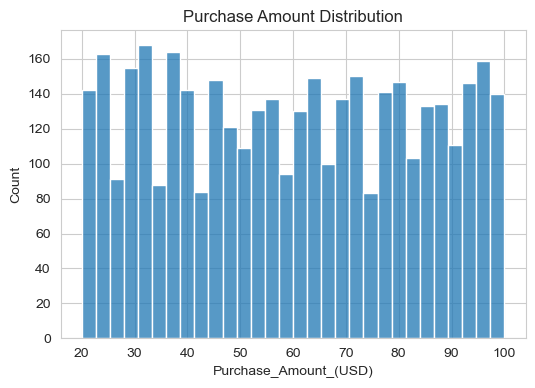

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df["Purchase_Amount_(USD)"], bins=30)
plt.title("Purchase Amount Distribution")
plt.show()

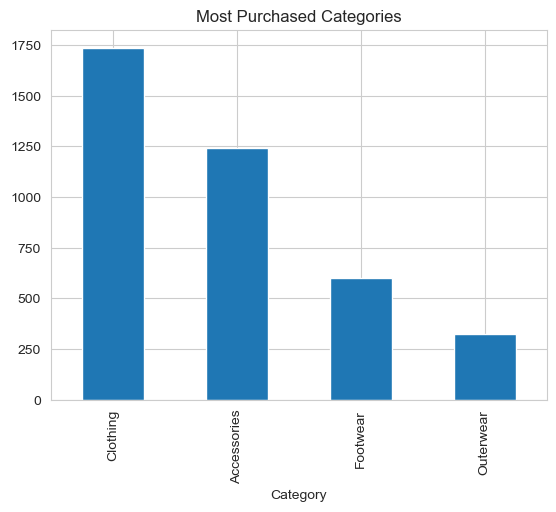

In [16]:
df["Category"].value_counts().plot(kind="bar")
plt.title("Most Purchased Categories")
plt.show()

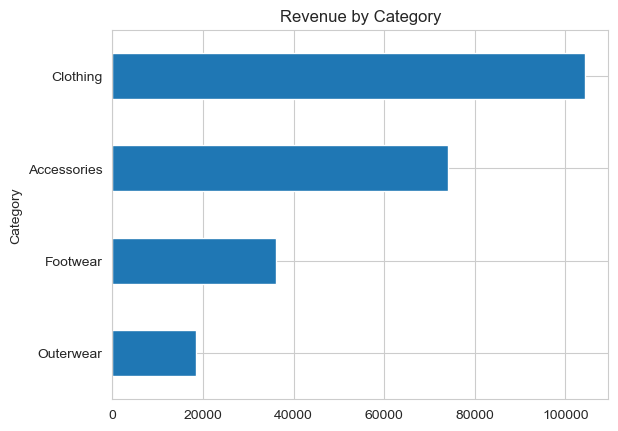

In [17]:
df.groupby("Category")["Purchase_Amount_(USD)"].sum().sort_values().plot(kind="barh")
plt.title("Revenue by Category")
plt.show()

In [18]:
df.groupby("Discount_Applied")["Purchase_Amount_(USD)"].mean()

Discount_Applied
No     60.130454
Yes    59.279070
Name: Purchase_Amount_(USD), dtype: float64

In [19]:
df["Promo_Code_Used"].value_counts(normalize=True)

Promo_Code_Used
No     0.57
Yes    0.43
Name: proportion, dtype: float64

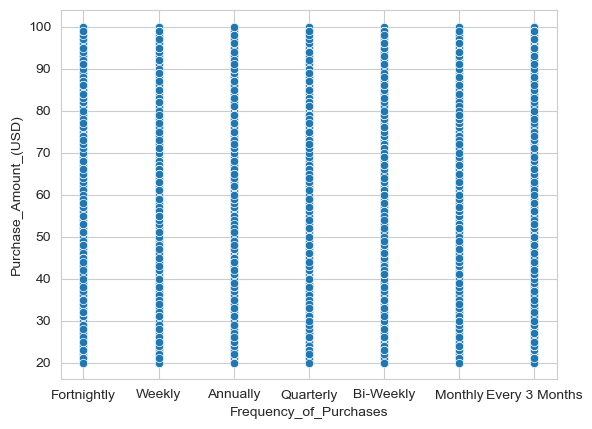

In [20]:
sns.scatterplot(
    x="Frequency_of_Purchases",
    y="Purchase_Amount_(USD)",
    data=df
)
plt.show()

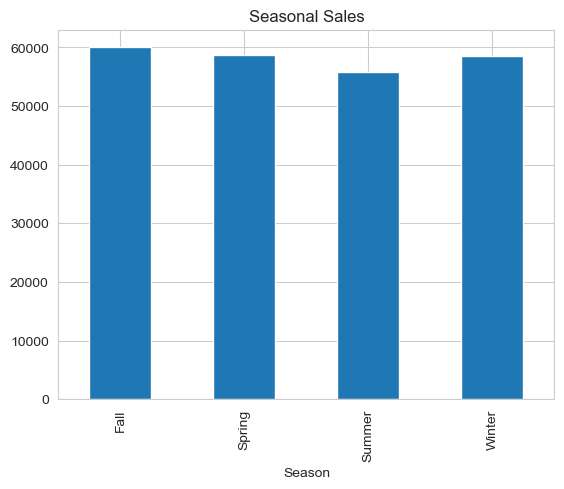

In [21]:
df.groupby("Season")["Purchase_Amount_(USD)"].sum().plot(kind="bar")
plt.title("Seasonal Sales")
plt.show()

In [23]:
customer_df = df.groupby("Customer_ID").agg({
    "Purchase_Amount_(USD)": ["sum", "mean"],
    "Frequency_of_Purchases": "mean",
    "Discount_Applied": "sum",
    "Promo_Code_Used": "sum"
})

customer_df.columns = [
    "total_spend",
    "avg_spend",
    "avg_frequency",
    "discount_usage",
    "promo_usage"
]

customer_df.head()

TypeError: agg function failed [how->mean,dtype->object]

In [24]:
df.dtypes

Customer_ID                   int64
Age                           int64
Gender                       object
Item_Purchased               object
Category                     object
Purchase_Amount_(USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review_Rating               float64
Subscription_Status          object
Payment_Method               object
Shipping_Type                object
Discount_Applied             object
Promo_Code_Used              object
Previous_Purchases            int64
Preferred_Payment_Method     object
Frequency_of_Purchases       object
dtype: object

In [25]:
# convert to numeric safely

df["Purchase_Amount_(USD)"] = pd.to_numeric(df["Purchase_Amount_(USD)"], errors="coerce")
df["Frequency_of_Purchases"] = pd.to_numeric(df["Frequency_of_Purchases"], errors="coerce")

# convert Yes/No to 1/0
df["Discount_Applied"] = df["Discount_Applied"].map({"Yes":1, "No":0})
df["Promo_Code_Used"] = df["Promo_Code_Used"].map({"Yes":1, "No":0})


In [52]:
customer_df = df.groupby("Customer_ID").agg({
    "Purchase_Amount_(USD)": ["sum", "mean"],
    "Frequency_of_Purchases": "sum",
    "Discount_Applied": "sum",
    "Promo_Code_Used": "sum"
})


In [53]:
customer_df.columns = ['_'.join(col) for col in customer_df.columns]

In [43]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Purchase_Amount_(USD), sum)   3900 non-null   int64  
 1   (Purchase_Amount_(USD), mean)  3900 non-null   float64
 2   (Frequency_of_Purchases, sum)  3900 non-null   float64
 3   (Discount_Applied, sum)        3900 non-null   int64  
 4   (Promo_Code_Used, sum)         3900 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 182.8 KB


In [44]:
customer_df.describe()

Purchase_Amount_(USD)              Frequency_of_Purchases  \
                        sum         mean                    sum   
count           3900.000000  3900.000000                 3900.0   
mean              59.764359    59.764359                    0.0   
std               23.685392    23.685392                    0.0   
min               20.000000    20.000000                    0.0   
25%               39.000000    39.000000                    0.0   
50%               60.000000    60.000000                    0.0   
75%               81.000000    81.000000                    0.0   
max              100.000000   100.000000                    0.0   

      Discount_Applied Promo_Code_Used  
                   sum             sum  
count      3900.000000     3900.000000  
mean          0.430000        0.430000  
std           0.495139        0.495139  
min           0.000000        0.000000  
25%           0.000000        0.000000  
50%           0.000000        0.000000  
75%           1.000000        1.000000  
max           1.000000        1.000000

In [45]:
print(customer_df.columns)

MultiIndex([( 'Purchase_Amount_(USD)',  'sum'),
            ( 'Purchase_Amount_(USD)', 'mean'),
            ('Frequency_of_Purchases',  'sum'),
            (      'Discount_Applied',  'sum'),
            (       'Promo_Code_Used',  'sum')],
           )


In [46]:
customer_df.columns = ['_'.join(col) for col in customer_df.columns]
customer_df.head()

,Purchase_Amount_(USD)_sum,Purchase_Amount_(USD)_mean,Frequency_of_Purchases_sum,Discount_Applied_sum,Promo_Code_Used_sum
Customer_ID,,,,,
1,53,53.0,0.0,1,1
2,64,64.0,0.0,1,1
3,73,73.0,0.0,1,1
4,90,90.0,0.0,1,1
5,49,49.0,0.0,1,1


In [35]:
plt.hist(customer_df["Purchase_Amount_USD_sum"], bins=20)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Customers")
plt.show()

KeyError: 'Purchase_Amount_USD_sum'

In [47]:
print(customer_df.columns)

Index(['Purchase_Amount_(USD)_sum', 'Purchase_Amount_(USD)_mean',
       'Frequency_of_Purchases_sum', 'Discount_Applied_sum',
       'Promo_Code_Used_sum'],
      dtype='object')


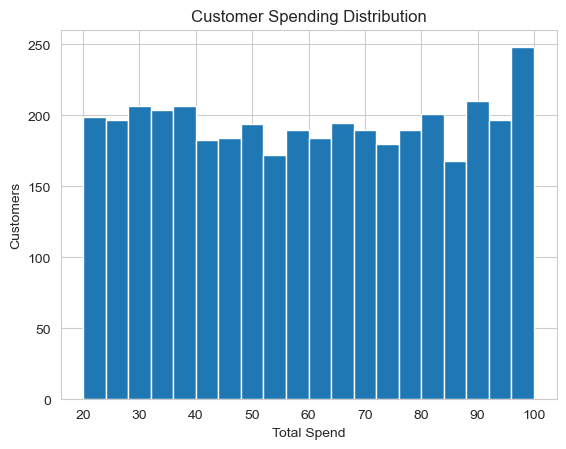

In [48]:
plt.hist(customer_df["Purchase_Amount_(USD)_sum"], bins=20)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Customers")
plt.show()

In [49]:
customer_df.describe()

,Purchase_Amount_(USD)_sum,Purchase_Amount_(USD)_mean,Frequency_of_Purchases_sum,Discount_Applied_sum,Promo_Code_Used_sum
count,3900.000000,3900.000000,3900.0,3900.000000,3900.000000
mean,59.764359,59.764359,0.0,0.430000,0.430000
std,23.685392,23.685392,0.0,0.495139,0.495139
min,20.000000,20.000000,0.0,0.000000,0.000000
25%,39.000000,39.000000,0.0,0.000000,0.000000
50%,60.000000,60.000000,0.0,0.000000,0.000000
75%,81.000000,81.000000,0.0,1.000000,1.000000
max,100.000000,100.000000,0.0,1.000000,1.000000


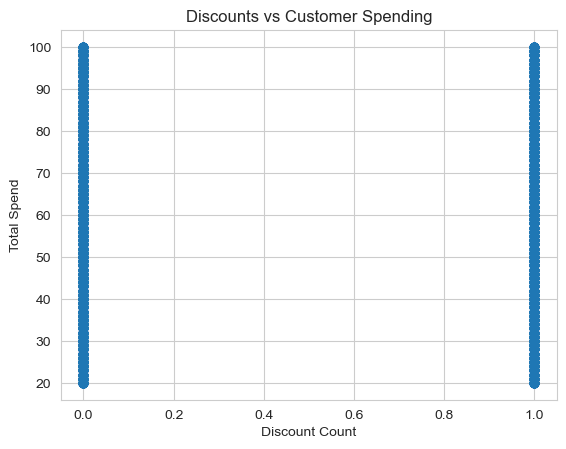

In [50]:
plt.scatter(customer_df["Discount_Applied_sum"], 
            customer_df["Purchase_Amount_(USD)_sum"])
plt.xlabel("Discount Count")
plt.ylabel("Total Spend")
plt.title("Discounts vs Customer Spending")
plt.show()

In [51]:
plt.scatter(customer_df["Frequency_of_Purchases_mean"], 
            customer_df["Purchase_Amount_(USD)_sum"])
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spend")
plt.title("Frequency vs Spending")
plt.show()

KeyError: 'Frequency_of_Purchases_mean'

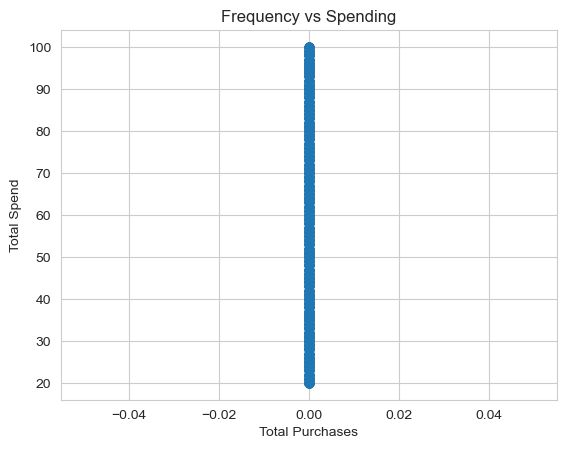

In [54]:
plt.scatter(customer_df["Frequency_of_Purchases_sum"],
            customer_df["Purchase_Amount_(USD)_sum"])
plt.xlabel("Total Purchases")
plt.ylabel("Total Spend")
plt.title("Frequency vs Spending")
plt.show()

In [55]:
customer_df.sort_values("Purchase_Amount_(USD)_sum", ascending=False).head(10)

,Purchase_Amount_(USD)_sum,Purchase_Amount_(USD)_mean,Frequency_of_Purchases_sum,Discount_Applied_sum,Promo_Code_Used_sum
Customer_ID,,,,,
2843,100,100.0,0.0,0,0
96,100,100.0,0.0,1,1
582,100,100.0,0.0,1,1
1422,100,100.0,0.0,1,1
3838,100,100.0,0.0,0,0
862,100,100.0,0.0,1,1
2215,100,100.0,0.0,0,0
1592,100,100.0,0.0,1,1
1457,100,100.0,0.0,1,1


In [56]:
customer_df["Segment"] = pd.qcut(
    customer_df["Purchase_Amount_(USD)_sum"],
    q=3,
    labels=["Low", "Medium", "High"]
)

customer_df.head()

,Purchase_Amount_(USD)_sum,Purchase_Amount_(USD)_mean,Frequency_of_Purchases_sum,Discount_Applied_sum,Promo_Code_Used_sum,Segment
Customer_ID,,,,,,
1,53,53.0,0.0,1,1,Medium
2,64,64.0,0.0,1,1,Medium
3,73,73.0,0.0,1,1,Medium
4,90,90.0,0.0,1,1,High
5,49,49.0,0.0,1,1,Medium


In [57]:
customer_df["Segment"].value_counts()

Segment
Medium    1303
Low       1300
High      1297
Name: count, dtype: int64

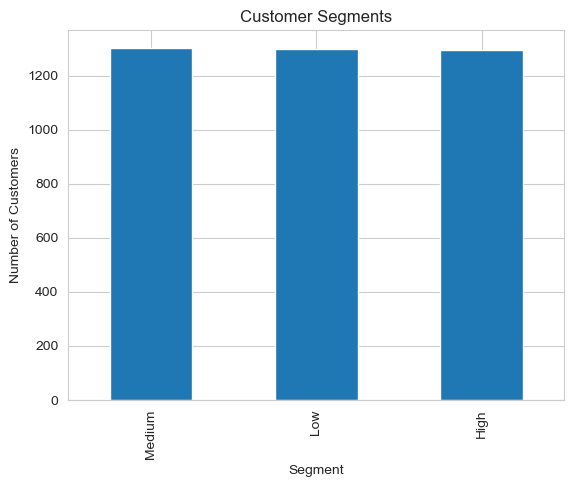

In [58]:
customer_df["Segment"].value_counts().plot(kind="bar")
plt.title("Customer Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

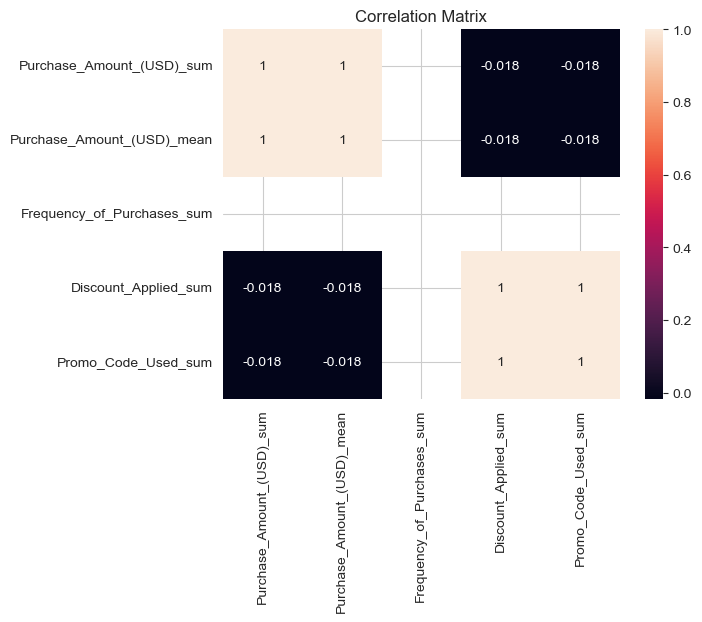

In [59]:
import seaborn as sns

sns.heatmap(customer_df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()